## load libraies

In [1]:
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.8.0'

In [3]:
tensorflow.__version__

'2.8.0'

## load dataset

In [4]:
train_data_path = r"D:\Engineering\ME\Hardik\SEM 3\DP 1\project datasets\balance_dataset\train"  #add data path
validation_data_path = r"D:\Engineering\ME\Hardik\SEM 3\DP 1\project datasets\balance_dataset\valid" #add data path

## image show function

In [10]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1,2,figsize=(10,10))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## multiple image generate

In [11]:
training_datagen = ImageDataGenerator(rescale = 1./255)


training_data = training_datagen.flow_from_directory(train_data_path,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="categorical")

Found 30815 images belonging to 7 classes.


In [12]:
training_data.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [13]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "categorical")
# 0-255==r, 0-255==g,0-255==b

Found 1745 images belonging to 7 classes.


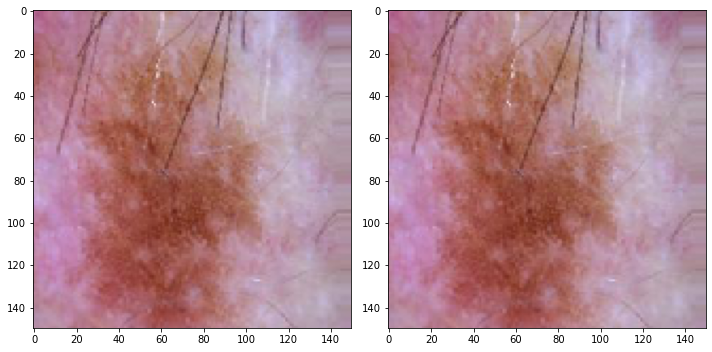

In [14]:
images = [training_data[0][0][0] for i in range(2)]
plotimages(images)

# model save

In [15]:
model_path = r"D:\skin_disease_classifier.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
callbacks_list = [checkpoint]

## create model

In [20]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation="relu"),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation="relu"),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=7, activation="softmax")
    
])

## model compile

In [21]:
cnn_model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

## train model

In [23]:
history = cnn_model.fit(training_data,
                       epochs=70,
                       verbose=1,
                       validation_data= valid_data,
                       callbacks=callbacks_list)

Epoch 1/70
 52/963 [>.............................] - ETA: 25:28 - loss: 3.0021 - accuracy: 0.1875

KeyboardInterrupt: 

In [ ]:
#accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

#loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()